**Pclass feature - convert this categorical features to dummy variables and check Result**

**Use the titanic_test.csv and predict the Survivors
and titanic_train.csv separately as Test and Train Data, instead of splitting Train Data**

In [32]:
import pandas as pd
import numpy as np

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
train = pd.read_csv('titanic_train.csv')

In [35]:
def impute_Age(cols):
    Age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(Age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        elif pclass == 3:
            return 24
    else:
        return Age

In [36]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_Age, axis=1)

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
train.drop('Cabin', axis=1, inplace=True )

In [39]:
train.dropna(inplace=True)

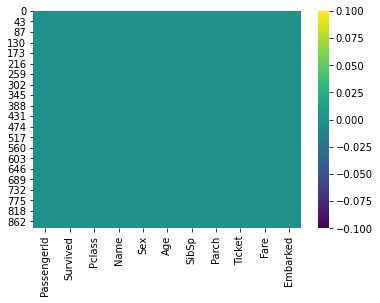

In [40]:
sns.heatmap(train.isnull(), cmap='viridis')

In [41]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embarked = pd.get_dummies(train['Embarked'], drop_first=True)
train = pd.concat([train, sex, embarked], axis=1)

In [42]:
train.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [43]:
train.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [44]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


**Pclass to be changed using get_dummies to treat as labeled values instead of continuous values**

In [47]:
pclass = pd.get_dummies(train['Pclass'], drop_first=True)

In [48]:
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [49]:
train = pd.concat([train, pclass], axis=1)

In [51]:
train.drop('Pclass', axis=1, inplace=True)

In [54]:
train.head(2)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0


LOGISTIC REGRESSION MODEL

In [55]:
X=train.drop('Survived', axis=1)
y = train['Survived']

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

f:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
predictions = logmodel.predict(X_test)

In [61]:
from sklearn.metrics import classification_report

In [62]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.68      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
confusion_matrix(y_test, predictions)

array([[150,  13],
       [ 33,  71]], dtype=int64)

**OBSERVATION**

**Pclass feature - convert this categorical features to dummy variables and check Result**
- No much difference in result

In [66]:
testdata = pd.read_csv('titanic_test.csv')

In [67]:
testdata.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [68]:
testdata['Age'] = testdata[['Age', 'Pclass']].apply(impute_Age, axis=1)

In [70]:
testdata.drop('Cabin', axis=1, inplace=True )

In [71]:
testdata.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q


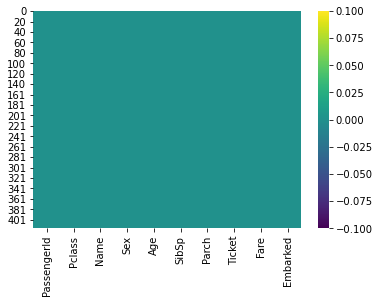

In [74]:
sns.heatmap(testdata.isnull(), cmap='viridis')

In [73]:
testdata.dropna(inplace=True)

In [75]:
sex = pd.get_dummies(testdata['Sex'], drop_first=True)
embarked = pd.get_dummies(testdata['Embarked'], drop_first=True)


In [76]:
sex.head()

,male
0,1
1,0
2,1
3,1
4,0


In [77]:
embarked.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [78]:
testdata = pd.concat([testdata, sex, embarked], axis=1)

In [79]:
testdata.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1


In [80]:
pclass = pd.get_dummies(testdata['Pclass'], drop_first=True)

In [81]:
pclass.head(2)

,2,3
0,0,1
1,0,1


In [82]:
testdata = pd.concat([testdata, pclass], axis=1)

In [83]:
testdata.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1,0,1


In [84]:
testdata.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [85]:
testdata.head(2)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,3,34.5,0,0,7.8292,1,1,0,0,1
1,3,47.0,1,0,7.0000,0,0,1,0,1


In [94]:
testdata.drop('Pclass', inplace=True, axis=1)

**LOGISTIC REGRESSION MODEL**

In [86]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']

In [88]:
X_test = testdata

In [89]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

f:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [95]:
predictions = logmodel.predict(X_test)

In [103]:
df_pred = pd.DataFrame()

In [104]:
df_pred['Survived'] = predictions

In [105]:
X_Result = pd.concat([X_test, df_pred], axis=1)


In [106]:
X_Result.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3,Survived
0,34.5,0.0,0.0,7.8292,1.0,1.0,0.0,0.0,1.0,0.0
1,47.0,1.0,0.0,7.0000,0.0,0.0,1.0,0.0,1.0,0.0
2,62.0,0.0,0.0,9.6875,1.0,1.0,0.0,1.0,0.0,0.0
3,27.0,0.0,0.0,8.6625,1.0,0.0,1.0,0.0,1.0,0.0
4,22.0,1.0,1.0,12.2875,0.0,0.0,1.0,0.0,1.0,1.0


In [107]:
X_Result

,Age,SibSp,Parch,Fare,male,Q,S,2,3,Survived
0,34.5,0.0,0.0,7.8292,1.0,1.0,0.0,0.0,1.0,0.0
1,47.0,1.0,0.0,7.0000,0.0,0.0,1.0,0.0,1.0,0.0
2,62.0,0.0,0.0,9.6875,1.0,1.0,0.0,1.0,0.0,0.0
3,27.0,0.0,0.0,8.6625,1.0,0.0,1.0,0.0,1.0,0.0
4,22.0,1.0,1.0,12.2875,0.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
413,24.0,0.0,0.0,8.0500,1.0,0.0,1.0,0.0,1.0,1.0
414,39.0,0.0,0.0,108.9000,0.0,0.0,0.0,0.0,0.0,0.0
415,38.5,0.0,0.0,7.2500,1.0,0.0,1.0,0.0,1.0,0.0
416,24.0,0.0,0.0,8.0500,1.0,0.0,1.0,0.0,1.0,0.0


In [110]:
X_Result['Survived'].value_counts()

0.0    265
1.0    152
Name: Survived, dtype: int64